In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the bank dataset

bank_data = pd.read_csv(r"C:\Users\Dlc\bank-direct-marketing-campaigns.csv", header=0)

# Copy the file to back-up file

bank_data_bk =bank_data.copy()

# Display first 5 records

bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#display the dataset information
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
#displaying duplicate values with in dataset
bank_data_dup=bank_data[bank_data.duplicated(keep='last')]
#display the duplicate records
bank_data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [5]:
#remove the identified duplicate records
bank_data=bank_data.drop_duplicates()
# display the shape of the dataset
bank_data.shape

(39404, 20)

In [7]:
#Re-setting the row index
bank_data=bank_data.reset_index(drop=True)
#copy file to back-up file after deletion of duplicate records
bank_data_BK2=bank_data.copy()

In [8]:
#display the unique values of all the variables
bank_data.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [20]:
#display 'y' categorical variable

bank_data['y'].value_counts()

no     34806
yes     4598
Name: y, dtype: int64

In [21]:
#use LabelEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bank_data['job']=LE.fit_transform(bank_data['job'])
bank_data['marital']=LE.fit_transform(bank_data['marital'])
bank_data['education']=LE.fit_transform(bank_data['education'])
bank_data['default']=LE.fit_transform(bank_data['default'])
bank_data['housing']=LE.fit_transform(bank_data['housing'])
bank_data['loan']=LE.fit_transform(bank_data['loan'])
bank_data['contact']=LE.fit_transform(bank_data['contact'])
bank_data['month']=LE.fit_transform(bank_data['month'])
bank_data['day_of_week']=LE.fit_transform(bank_data['day_of_week'])
bank_data['poutcome']=LE.fit_transform(bank_data['poutcome'])
bank_data['y']=LE.fit_transform(bank_data['y'])


In [23]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39404 entries, 0 to 39403
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  int32  
 2   marital         39404 non-null  int32  
 3   education       39404 non-null  int32  
 4   default         39404 non-null  int32  
 5   housing         39404 non-null  int32  
 6   loan            39404 non-null  int32  
 7   contact         39404 non-null  int32  
 8   month           39404 non-null  int32  
 9   day_of_week     39404 non-null  int32  
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  int32  
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

In [24]:
#identify the missing values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
#display the unique values of all the variables
bank_data.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [26]:
#change the name of variable
bank_data=bank_data.rename(columns={'emp.var.rate':'emp_var_rate'},inplace=False)
bank_data=bank_data.rename(columns={'cons.price.idx':'cons_price_idx'},inplace=False)
bank_data=bank_data.rename(columns={'cons.conf.idx':'cons_conf_idx'},inplace=False)
bank_data=bank_data.rename(columns={'nr.employed':'nr_employed'},inplace=False)

In [28]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39404 entries, 0 to 39403
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  int32  
 2   marital         39404 non-null  int32  
 3   education       39404 non-null  int32  
 4   default         39404 non-null  int32  
 5   housing         39404 non-null  int32  
 6   loan            39404 non-null  int32  
 7   contact         39404 non-null  int32  
 8   month           39404 non-null  int32  
 9   day_of_week     39404 non-null  int32  
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  int32  
 14  emp_var_rate    39404 non-null  float64
 15  cons_price_idx  39404 non-null  float64
 16  cons_conf_idx   39404 non-null  float64
 17  euribor3m       39404 non-null 

In [33]:

cols=['age','job','marital','education','default','housing','loan','month','day_of_week','campaign','pdays','previous','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']

In [29]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

y_count =bank_data.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[0] / y_count[1], 2), ': 1')
print('Total records:', len(bank_data))

Class 0: 34806
Class 1: 4598
Proportion: 7.57 : 1
Total records: 39404


In [30]:
#Identify the dependent and independent variables
IndepVar=[]
for col in bank_data.columns:
    if col!='y':
        IndepVar.append(col)
TargetVar='y'
x=bank_data[IndepVar]
y=bank_data[TargetVar]

In [31]:
#split the data into train and test(random sampling)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
#display the shape for train & test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((27582, 19), (11822, 19), (27582,), (11822,))

In [34]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols]= mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# knn algorithm

In [35]:
#load the results dataset for KNN
KNN_Results=pd.read_csv(r"C:\Users\Dlc\KNN_Results.csv", header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 434  964]
 [ 954 9470]]
Outcome values : 
 434 964 954 9470
Classification report : 
               precision    recall  f1-score   support

           1       0.31      0.31      0.31      1398
           0       0.91      0.91      0.91     10424

    accuracy                           0.84     11822
   macro avg       0.61      0.61      0.61     11822
weighted avg       0.84      0.84      0.84     11822

Accuracy : 83.8 %
Precision : 31.3 %
Recall : 31.0 %
F1 Score : 0.312
Specificity or True Negative Rate : 90.8 %
Balanced Accuracy : 60.9 %
MCC : 0.22
roc_auc_score: 0.609


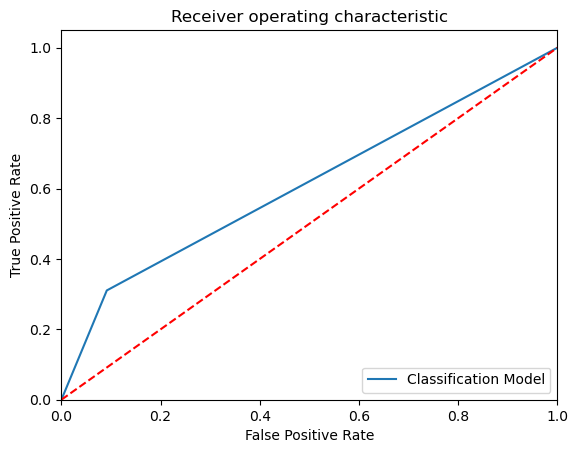

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  220  1178]
 [  197 10227]]
Outcome values : 
 220 1178 197 10227
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.16      0.24      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.88     11822
   macro avg       0.71      0.57      0.59     11822
weighted avg       0.85      0.88      0.85     11822

Accuracy : 88.4 %
Precision : 52.8 %
Recall : 15.7 %
F1 Score : 0.242
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 56.9 %
MCC : 0.242
roc_auc_score: 0.569


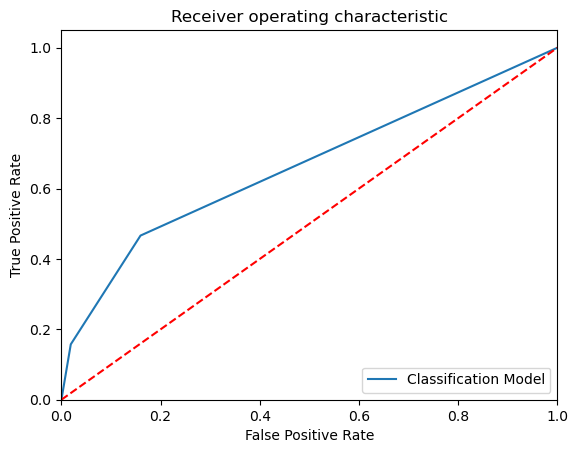

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 394 1004]
 [ 461 9963]]
Outcome values : 
 394 1004 461 9963
Classification report : 
               precision    recall  f1-score   support

           1       0.46      0.28      0.35      1398
           0       0.91      0.96      0.93     10424

    accuracy                           0.88     11822
   macro avg       0.68      0.62      0.64     11822
weighted avg       0.86      0.88      0.86     11822

Accuracy : 87.6 %
Precision : 46.1 %
Recall : 28.2 %
F1 Score : 0.35
Specificity or True Negative Rate : 95.6 %
Balanced Accuracy : 61.9 %
MCC : 0.296
roc_auc_score: 0.619


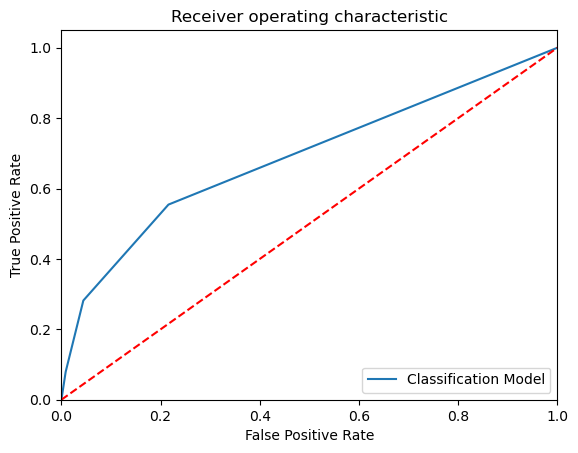

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  249  1149]
 [  184 10240]]
Outcome values : 
 249 1149 184 10240
Classification report : 
               precision    recall  f1-score   support

           1       0.58      0.18      0.27      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.74      0.58      0.61     11822
weighted avg       0.86      0.89      0.86     11822

Accuracy : 88.7 %
Precision : 57.5 %
Recall : 17.8 %
F1 Score : 0.272
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 58.0 %
MCC : 0.276
roc_auc_score: 0.58


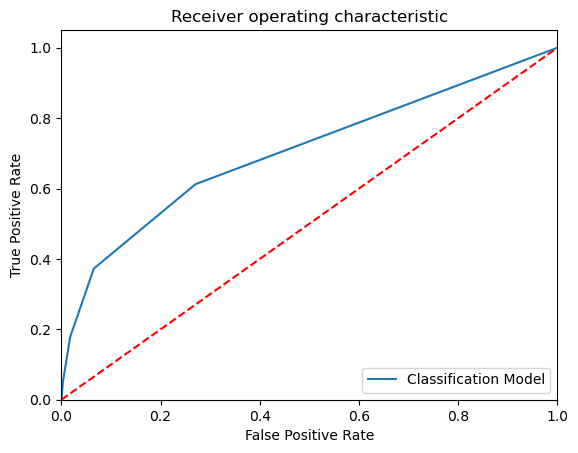

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  373  1025]
 [  303 10121]]
Outcome values : 
 373 1025 303 10121
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.27      0.36      1398
           0       0.91      0.97      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.73      0.62      0.65     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 88.8 %
Precision : 55.2 %
Recall : 26.7 %
F1 Score : 0.36
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 61.9 %
MCC : 0.331
roc_auc_score: 0.619


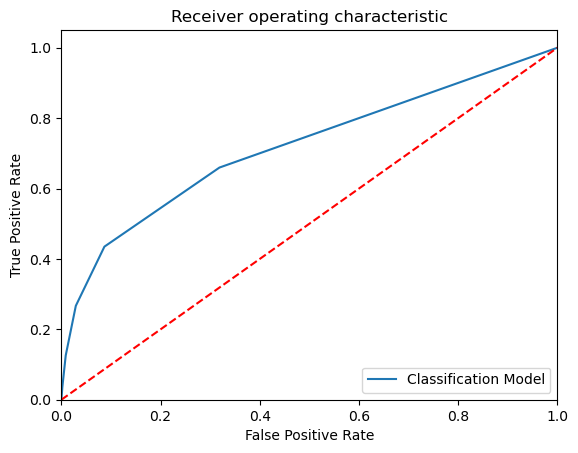

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  287  1111]
 [  173 10251]]
Outcome values : 
 287 1111 173 10251
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.21      0.31      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.76      0.59      0.62     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.1 %
Precision : 62.4 %
Recall : 20.5 %
F1 Score : 0.309
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 59.4 %
MCC : 0.315
roc_auc_score: 0.594


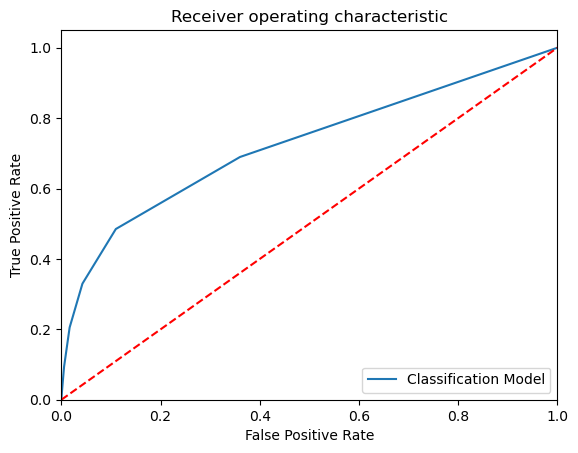

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  363  1035]
 [  254 10170]]
Outcome values : 
 363 1035 254 10170
Classification report : 
               precision    recall  f1-score   support

           1       0.59      0.26      0.36      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.75      0.62      0.65     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.1 %
Precision : 58.8 %
Recall : 26.0 %
F1 Score : 0.36
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 61.8 %
MCC : 0.342
roc_auc_score: 0.618


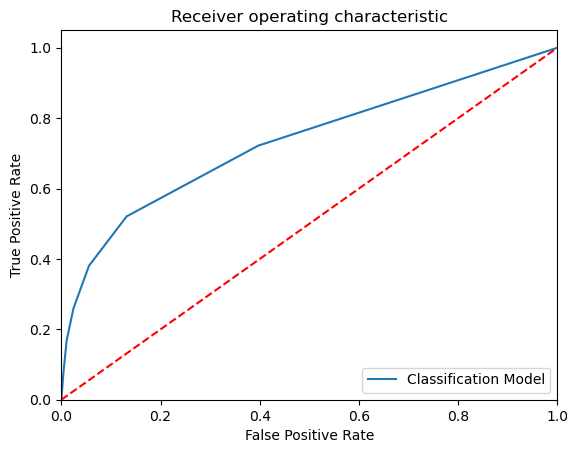

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  299  1099]
 [  172 10252]]
Outcome values : 
 299 1099 172 10252
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.21      0.32      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.60      0.63     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.2 %
Precision : 63.5 %
Recall : 21.4 %
F1 Score : 0.32
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 59.8 %
MCC : 0.326
roc_auc_score: 0.599


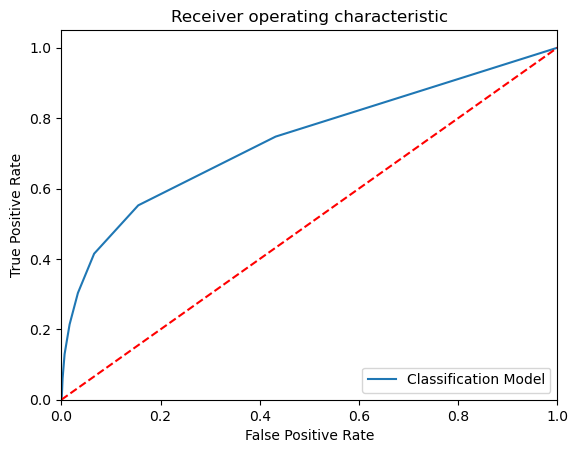

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  356  1042]
 [  235 10189]]
Outcome values : 
 356 1042 235 10189
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.25      0.36      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.75      0.62      0.65     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.2 %
Precision : 60.2 %
Recall : 25.5 %
F1 Score : 0.358
Specificity or True Negative Rate : 97.7 %
Balanced Accuracy : 61.6 %
MCC : 0.344
roc_auc_score: 0.616


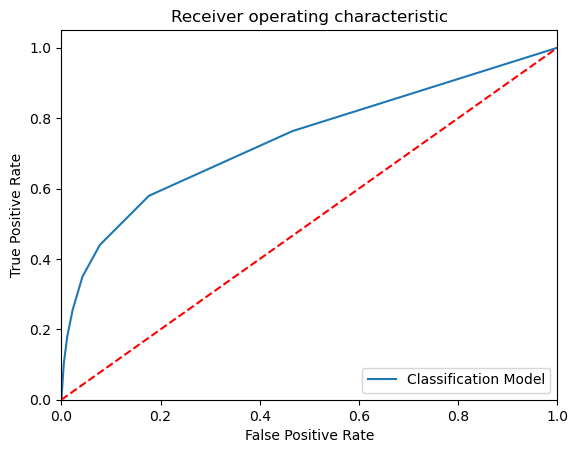

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[  301  1097]
 [  156 10268]]
Outcome values : 
 301 1097 156 10268
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.22      0.32      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.63     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 65.9 %
Recall : 21.5 %
F1 Score : 0.325
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.0 %
MCC : 0.336
roc_auc_score: 0.6


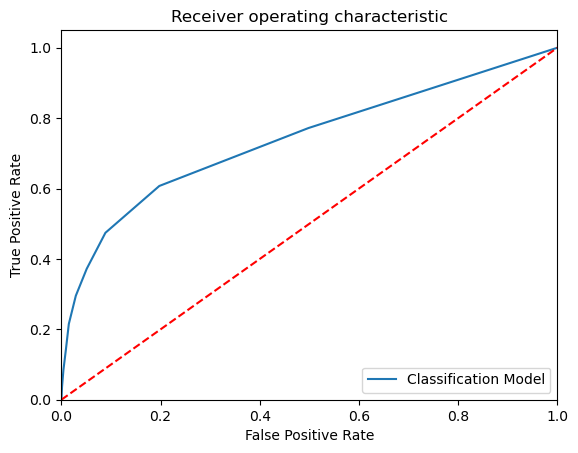

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[  352  1046]
 [  206 10218]]
Outcome values : 
 352 1046 206 10218
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.25      0.36      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.62      0.65     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 63.1 %
Recall : 25.2 %
F1 Score : 0.36
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 61.6 %
MCC : 0.353
roc_auc_score: 0.616


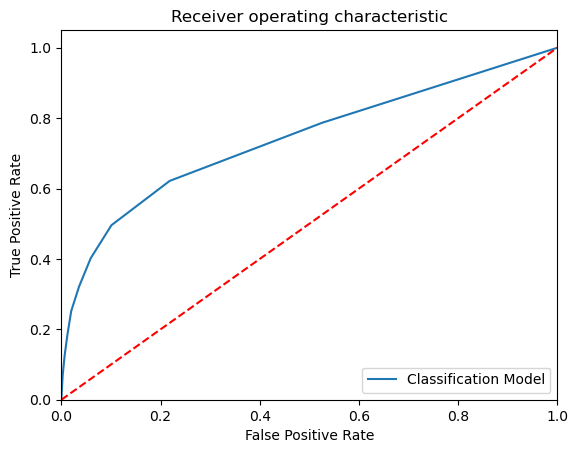

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[  308  1090]
 [  158 10266]]
Outcome values : 
 308 1090 158 10266
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.22      0.33      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.64     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 66.1 %
Recall : 22.0 %
F1 Score : 0.33
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.2 %
MCC : 0.34
roc_auc_score: 0.603


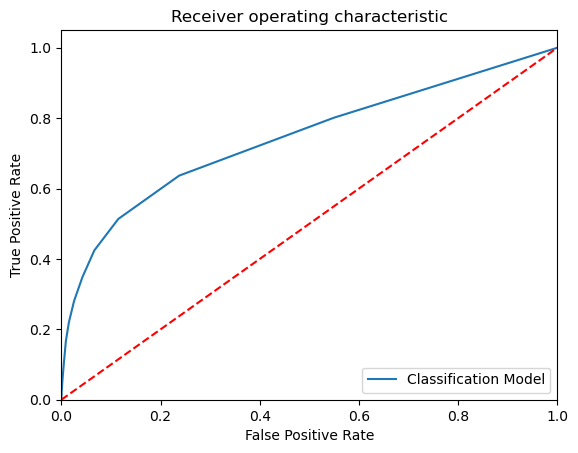

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  349  1049]
 [  195 10229]]
Outcome values : 
 349 1049 195 10229
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.25      0.36      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.62      0.65     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 64.2 %
Recall : 25.0 %
F1 Score : 0.359
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 61.5 %
MCC : 0.356
roc_auc_score: 0.615


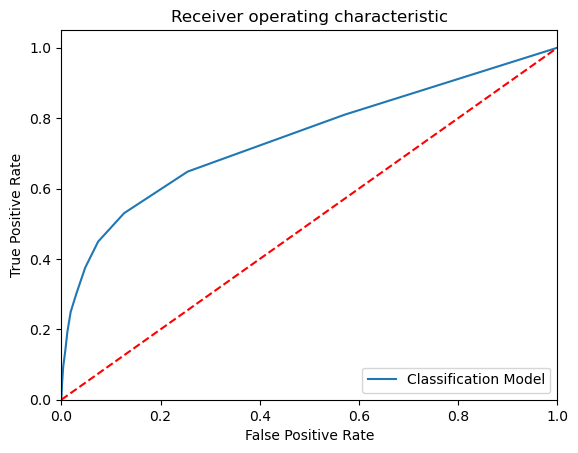

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[  310  1088]
 [  163 10261]]
Outcome values : 
 310 1088 163 10261
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.22      0.33      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.64     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 65.5 %
Recall : 22.2 %
F1 Score : 0.331
Specificity or True Negative Rate : 98.4 %
Balanced Accuracy : 60.3 %
MCC : 0.34
roc_auc_score: 0.603


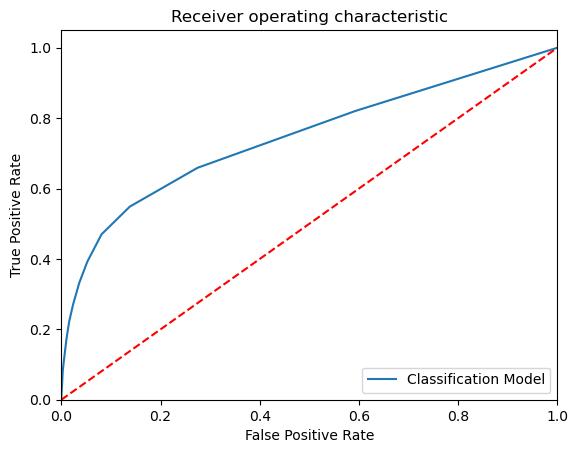

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[  342  1056]
 [  191 10233]]
Outcome values : 
 342 1056 191 10233
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.24      0.35      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.61      0.65     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 64.2 %
Recall : 24.5 %
F1 Score : 0.354
Specificity or True Negative Rate : 98.2 %
Balanced Accuracy : 61.3 %
MCC : 0.352
roc_auc_score: 0.613


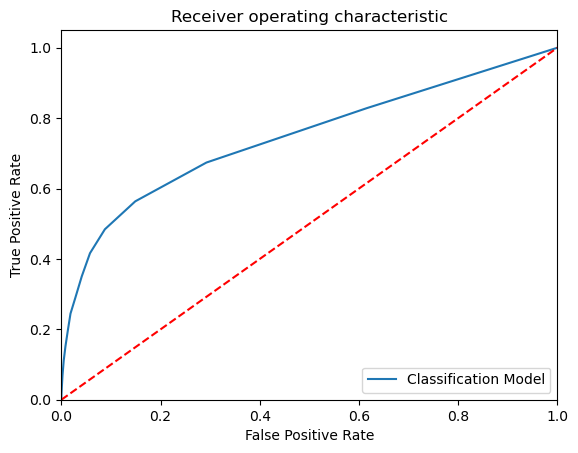

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[  310  1088]
 [  157 10267]]
Outcome values : 
 310 1088 157 10267
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.22      0.33      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.64     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 66.4 %
Recall : 22.2 %
F1 Score : 0.332
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.4 %
MCC : 0.343
roc_auc_score: 0.603


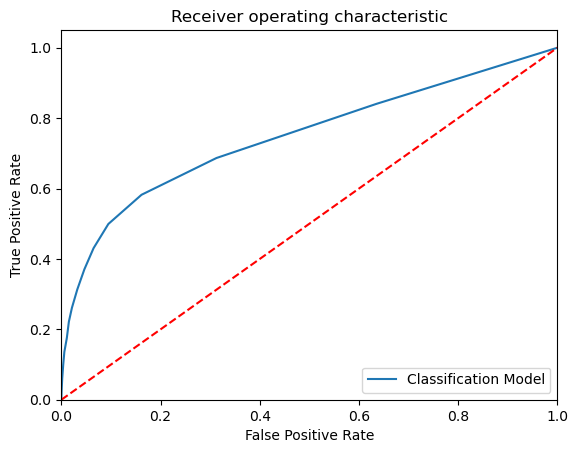

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[  334  1064]
 [  180 10244]]
Outcome values : 
 334 1064 180 10244
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.24      0.35      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.61      0.65     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 65.0 %
Recall : 23.9 %
F1 Score : 0.349
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 61.1 %
MCC : 0.351
roc_auc_score: 0.611


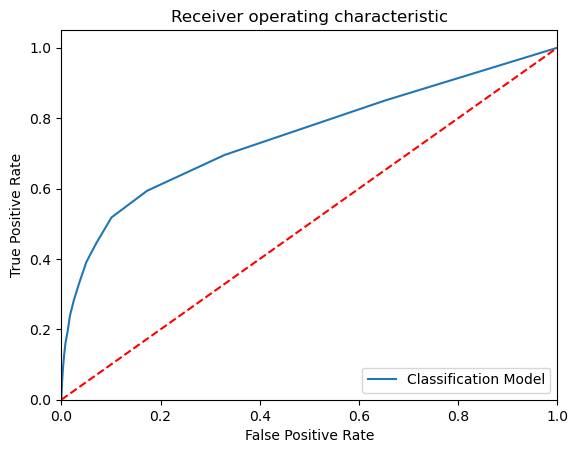

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[  305  1093]
 [  152 10272]]
Outcome values : 
 305 1093 152 10272
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.22      0.33      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.79      0.60      0.64     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 66.7 %
Recall : 21.8 %
F1 Score : 0.329
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 60.2 %
MCC : 0.341
roc_auc_score: 0.602


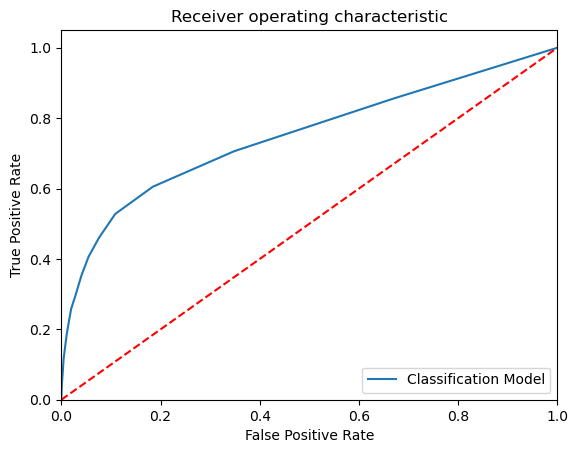

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[  325  1073]
 [  174 10250]]
Outcome values : 
 325 1073 174 10250
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.23      0.34      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.61      0.64     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 65.1 %
Recall : 23.2 %
F1 Score : 0.343
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 60.8 %
MCC : 0.347
roc_auc_score: 0.608


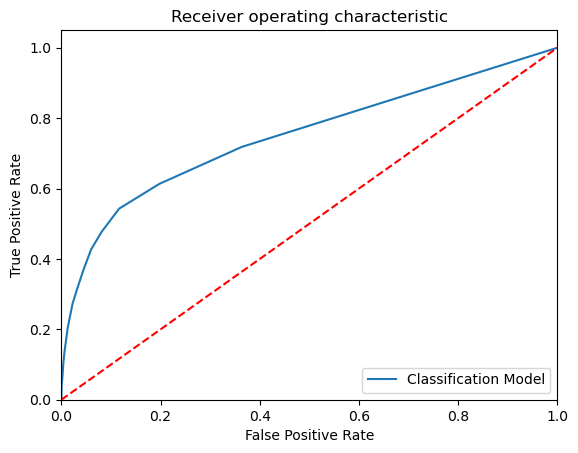

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[  301  1097]
 [  151 10273]]
Outcome values : 
 301 1097 151 10273
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.22      0.33      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.63     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 66.6 %
Recall : 21.5 %
F1 Score : 0.325
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 60.0 %
MCC : 0.338
roc_auc_score: 0.6


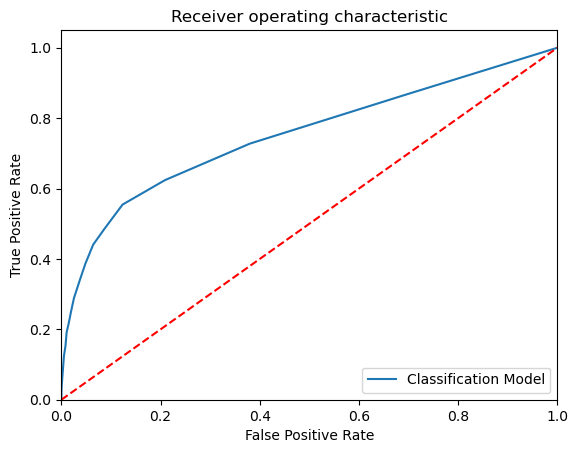

In [36]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------


In [39]:
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,434,964,954,9470,0.838,0.313,0.310,0.312,0.908,0.220,0.609462,0.609
1,KNeighborsClassifier(n_neighbors=2),2,220,1178,197,10227,0.884,0.528,0.157,0.242,0.981,0.242,0.569234,0.569
2,KNeighborsClassifier(n_neighbors=3),3,394,1004,461,9963,0.876,0.461,0.282,0.350,0.956,0.296,0.618803,0.619
3,KNeighborsClassifier(n_neighbors=4),4,249,1149,184,10240,0.887,0.575,0.178,0.272,0.982,0.276,0.580230,0.580
4,KNeighborsClassifier(),5,373,1025,303,10121,0.888,0.552,0.267,0.360,0.971,0.331,0.618871,0.619
5,KNeighborsClassifier(n_neighbors=6),6,287,1111,173,10251,0.891,0.624,0.205,0.309,0.983,0.315,0.594348,0.594
6,KNeighborsClassifier(n_neighbors=7),7,363,1035,254,10170,0.891,0.588,0.260,0.360,0.976,0.342,0.617645,0.618
7,KNeighborsClassifier(n_neighbors=8),8,299,1099,172,10252,0.892,0.635,0.214,0.320,0.983,0.326,0.598688,0.598
8,KNeighborsClassifier(n_neighbors=9),9,356,1042,235,10189,0.892,0.602,0.255,0.358,0.977,0.344,0.616053,0.616
9,KNeighborsClassifier(n_neighbors=10),10,301,1097,156,10268,0.894,0.659,0.215,0.325,0.985,0.336,0.600171,0.600


# svm algorithm

In [50]:
#load the results dataset for SVM
EMResults1=pd.read_csv(r"C:\Users\Dlc\EMResults (2).csv", header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[  281  1117]
 [  160 10264]]
Outcome values : 
 281 1117 160 10264
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.20      0.31      1398
           0       0.90      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.59      0.62     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 89.2 %
Precision : 63.7 %
Recall : 20.1 %
F1 Score : 0.306
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 59.3 %
MCC : 0.316
roc_auc_score: 0.593


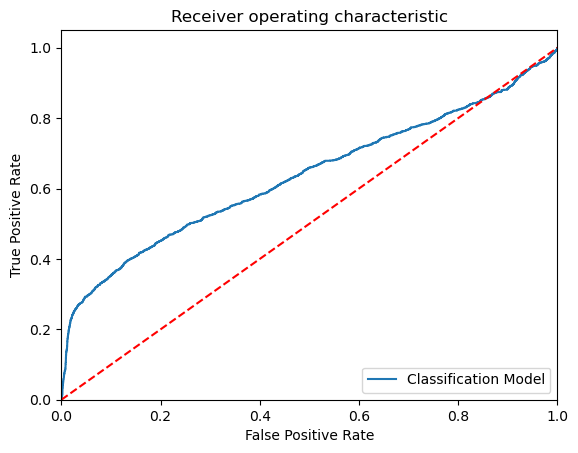

-----------------------------------------------------------------------------------------------------


In [51]:
#svm-linear kernel
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

In [52]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,281,1117,160,10264,0.892,0.637,0.201,0.306,0.985,0.316,0.592826,0.593


Model Name:  SVM - Polynominal
Confusion matrix : 
 [[  256  1142]
 [  115 10309]]
Outcome values : 
 256 1142 115 10309
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.18      0.29      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.80      0.59      0.62     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.4 %
Precision : 69.0 %
Recall : 18.3 %
F1 Score : 0.289
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 58.6 %
MCC : 0.319
roc_auc_score: 0.586


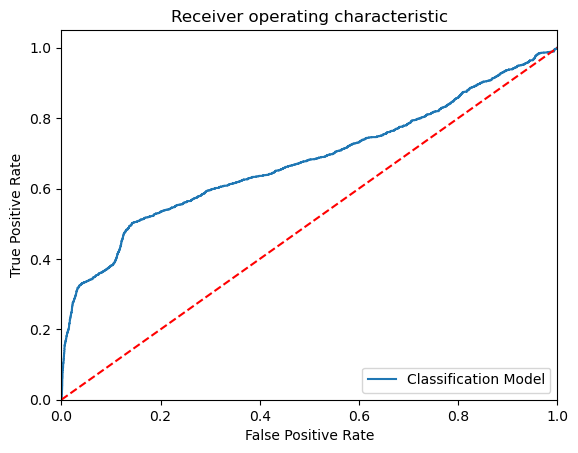

-----------------------------------------------------------------------------------------------------


In [41]:
#svm-polynomial kernel
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

In [42]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Polynominal,256,1142,115,10309,0.894,0.69,0.183,0.289,0.989,0.319,0.586043,0.586


Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 859  539]
 [1588 8836]]
Outcome values : 
 859 539 1588 8836
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.61      0.45      1398
           0       0.94      0.85      0.89     10424

    accuracy                           0.82     11822
   macro avg       0.65      0.73      0.67     11822
weighted avg       0.87      0.82      0.84     11822

Accuracy : 82.0 %
Precision : 35.1 %
Recall : 61.4 %
F1 Score : 0.447
Specificity or True Negative Rate : 84.8 %
Balanced Accuracy : 73.1 %
MCC : 0.368
roc_auc_score: 0.731


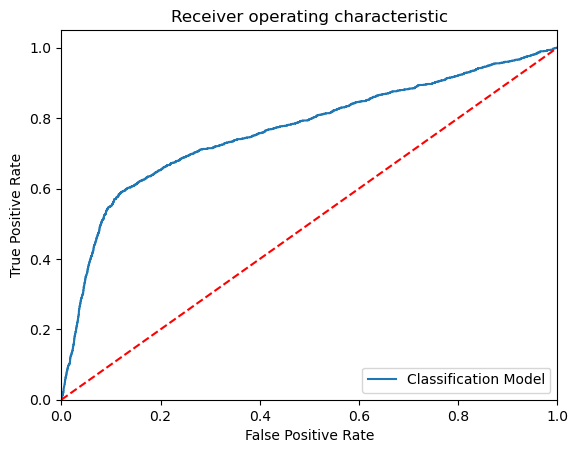

-----------------------------------------------------------------------------------------------------


In [43]:
#svm-guassian kernel
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [44]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Polynominal,256,1142,115,10309,0.894,0.690,0.183,0.289,0.989,0.319,0.586043,0.586
1,SVM - Gaussian,859,539,1588,8836,0.820,0.351,0.614,0.447,0.848,0.368,0.731054,0.731


Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 914  484]
 [3483 6941]]
Outcome values : 
 914 484 3483 6941
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.65      0.32      1398
           0       0.93      0.67      0.78     10424

    accuracy                           0.66     11822
   macro avg       0.57      0.66      0.55     11822
weighted avg       0.85      0.66      0.72     11822

Accuracy : 66.4 %
Precision : 20.8 %
Recall : 65.4 %
F1 Score : 0.315
Specificity or True Negative Rate : 66.6 %
Balanced Accuracy : 66.0 %
MCC : 0.214
roc_auc_score: 0.66


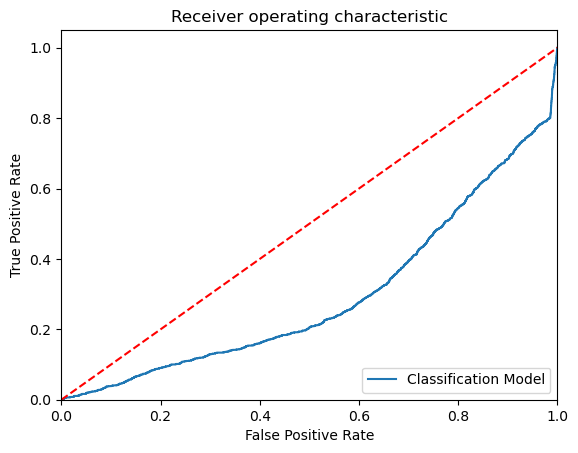

-----------------------------------------------------------------------------------------------------


In [45]:
#svm-sigmoid kernel

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [48]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Polynominal,256,1142,115,10309,0.894,0.690,0.183,0.289,0.989,0.319,0.586043,0.586
1,SVM - Gaussian,859,539,1588,8836,0.820,0.351,0.614,0.447,0.848,0.368,0.731054,0.731
2,SVM - Sigmoid,914,484,3483,6941,0.664,0.208,0.654,0.315,0.666,0.214,0.659829,0.660


# compare classification algorithm

In [53]:
#load the dataset
EMResults=pd.read_csv(r"C:\Users\Dlc\EMResults (2).csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  293  1105]
 [  141 10283]]
Outcome values : 
 293 1105 141 10283
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.21      0.32      1398
           0       0.90      0.99      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.79      0.60      0.63     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 67.5 %
Recall : 21.0 %
F1 Score : 0.32
Specificity or True Negative Rate : 98.6 %
Balanced Accuracy : 59.8 %
MCC : 0.337
roc_auc_score: 0.598


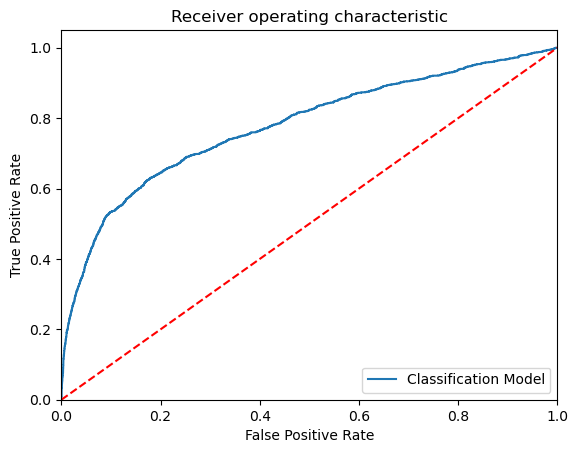

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 446  952]
 [1162 9262]]
Outcome values : 
 446 952 1162 9262
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.32      0.30      1398
           0       0.91      0.89      0.90     10424

    accuracy                           0.82     11822
   macro avg       0.59      0.60      0.60     11822
weighted avg       0.83      0.82      0.83     11822

Accuracy : 82.1 %
Precision : 27.7 %
Recall : 31.9 %
F1 Score : 0.297
Specificity or True Negative Rate : 88.9 %
Balanced Accuracy : 60.4 %
MCC : 0.196
roc_auc_score: 0.604


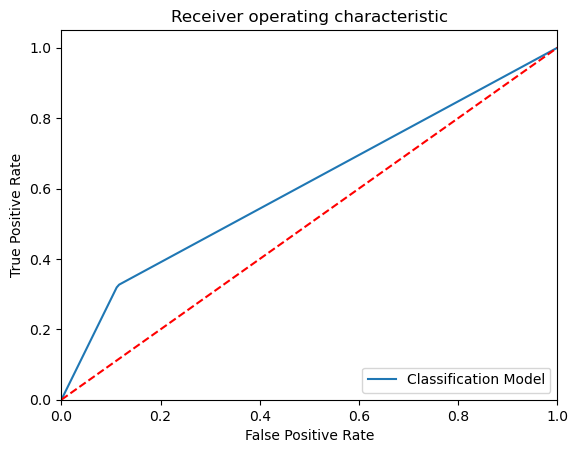

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[  409   989]
 [  341 10083]]
Outcome values : 
 409 989 341 10083
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.29      0.38      1398
           0       0.91      0.97      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.73      0.63      0.66     11822
weighted avg       0.87      0.89      0.87     11822

Accuracy : 88.7 %
Precision : 54.5 %
Recall : 29.3 %
F1 Score : 0.381
Specificity or True Negative Rate : 96.7 %
Balanced Accuracy : 63.0 %
MCC : 0.344
roc_auc_score: 0.63


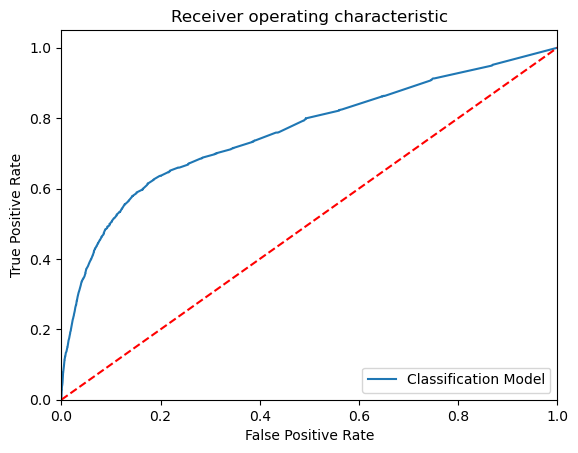

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[  397  1001]
 [  413 10011]]
Outcome values : 
 397 1001 413 10011
Classification report : 
               precision    recall  f1-score   support

           1       0.49      0.28      0.36      1398
           0       0.91      0.96      0.93     10424

    accuracy                           0.88     11822
   macro avg       0.70      0.62      0.65     11822
weighted avg       0.86      0.88      0.87     11822

Accuracy : 88.0 %
Precision : 49.0 %
Recall : 28.4 %
F1 Score : 0.36
Specificity or True Negative Rate : 96.0 %
Balanced Accuracy : 62.2 %
MCC : 0.312
roc_auc_score: 0.622


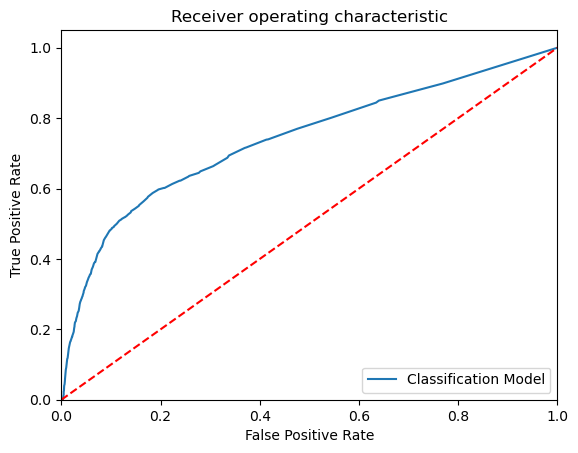

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[  349  1049]
 [  195 10229]]
Outcome values : 
 349 1049 195 10229
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.25      0.36      1398
           0       0.91      0.98      0.94     10424

    accuracy                           0.89     11822
   macro avg       0.77      0.62      0.65     11822
weighted avg       0.88      0.89      0.87     11822

Accuracy : 89.5 %
Precision : 64.2 %
Recall : 25.0 %
F1 Score : 0.359
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 61.5 %
MCC : 0.356
roc_auc_score: 0.615


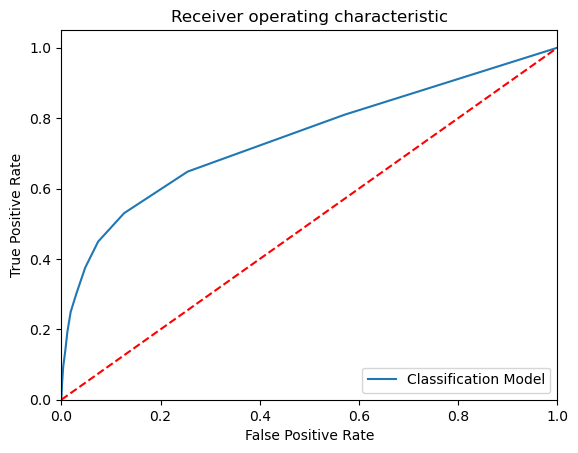

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='poly', probability=True, random_state=42)
Confusion matrix : 
 [[ 841  557]
 [1487 8937]]
Outcome values : 
 841 557 1487 8937
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.60      0.45      1398
           0       0.94      0.86      0.90     10424

    accuracy                           0.83     11822
   macro avg       0.65      0.73      0.67     11822
weighted avg       0.87      0.83      0.84     11822

Accuracy : 82.7 %
Precision : 36.1 %
Recall : 60.2 %
F1 Score : 0.451
Specificity or True Negative Rate : 85.7 %
Balanced Accuracy : 73.0 %
MCC : 0.373
roc_auc_score: 0.729


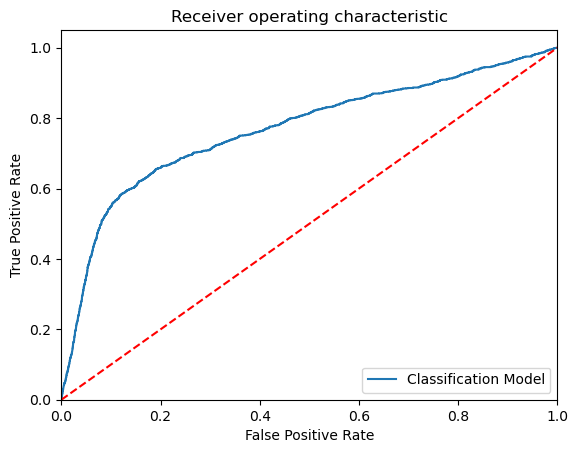

-----------------------------------------------------------------------------------------------------


In [54]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=13)
ModelSVM = SVC(kernel='poly', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [55]:
#predict the values with logistic regression algorithm
y_predF=ModelKNN.predict(x_test)

In [56]:
#display the final results
Results=pd.DataFrame({'y_A':y_test,'y_P':y_predF})
#merge two dataframes on index of both dataframes
ResultsFinal=bank_data_BK2.merge(Results,left_index=True,right_index=True)
#display 5 records randomly
ResultsFinal.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_A,y_P
37476,33,admin.,married,university.degree,no,no,no,cellular,mar,fri,2,999,1,failure,-1.8,93.369,-34.8,0.649,5008.7,no,0,0
28204,57,management,divorced,university.degree,unknown,yes,no,cellular,apr,mon,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no,0,0
36833,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,4,999,1,failure,-3.4,92.649,-30.1,0.722,5017.5,no,0,0
5216,48,services,married,professional.course,no,yes,no,telephone,may,fri,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0
16164,38,admin.,divorced,high.school,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,0
